<a href="https://colab.research.google.com/github/PRAVEEN-tech777/Predicting-Resale-Price/blob/main/ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importing and Reading Combined Data

In [13]:
df = pd.read_csv('combined.csv')
df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,61
1,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,61
2,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,61
3,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,61
4,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222639,1.445029,103.829460,118B,CANBERRA CRESCENT,752118,118B CANBERRA CRES,18080.394744,217.505769,2024-07,SEMBAWANG,4 ROOM,118B,CANBERRA CRES,07 TO 09,95.0,Model A,2020,725600.0,94 years 11 months,95
222640,1.391577,103.870445,455A,SENGKANG WEST AVENUE,791455,455A SENGKANG WEST AVE,12193.435573,2662.397527,2024-06,SENGKANG,2 ROOM,455A,SENGKANG WEST AVE,01 TO 03,48.0,2-room,2020,350000.0,95 years 05 months,95
222641,1.332728,103.849994,185,TOA PAYOH CENTRAL,310185,185 TOA PAYOH CTRL,5500.581714,265.512287,2024-06,TOA PAYOH,3 ROOM,185,TOA PAYOH CTRL,01 TO 03,67.0,Improved,1972,390000.0,47 years 02 months,47
222642,1.444637,103.829635,118A,CANBERRA CRESCENT,751118,118A CANBERRA CRES,18034.887863,172.699746,2024-07,SEMBAWANG,2 ROOM,118A,CANBERRA CRES,10 TO 12,47.0,Model A,2020,418000.0,94 years 11 months,95


In [14]:
df.dtypes

latitude               float64
longitude              float64
blk_no                  object
road_name               object
postal_code              int64
address                 object
cbd_dist               float64
min_dist_mrt           float64
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
lease_remain_years       int64
dtype: object

In [15]:
df.isnull().sum()

latitude               0
longitude              0
blk_no                 0
road_name              0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
lease_remain_years     0
dtype: int64

# Minor Data Preprocessing for Combined Data

In [16]:
import statistics

def get_median(x):
    if isinstance(x, str):  # Check if x is a string before splitting
        split_list = x.split(' TO ')
        float_list = [float(i) for i in split_list]
        median = statistics.median(float_list)
        return median
    else:
        return x  # Return the original value if it's not a string

df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))
df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,storey_median
0,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2015-01,ANG MO KIO,...,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,61,8.0
1,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2015-12,ANG MO KIO,...,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,69,61,11.0
2,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-05,ANG MO KIO,...,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,68,61,5.0
3,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-06,ANG MO KIO,...,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,68,61,8.0
4,1.375097,103.837619,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,10296.855747,1098.780832,2016-11,ANG MO KIO,...,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,68,61,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222639,1.445029,103.829460,118B,CANBERRA CRESCENT,752118,118B CANBERRA CRES,18080.394744,217.505769,2024-07,SEMBAWANG,...,118B,CANBERRA CRES,07 TO 09,95.0,Model A,2020,725600.0,94 years 11 months,95,8.0
222640,1.391577,103.870445,455A,SENGKANG WEST AVENUE,791455,455A SENGKANG WEST AVE,12193.435573,2662.397527,2024-06,SENGKANG,...,455A,SENGKANG WEST AVE,01 TO 03,48.0,2-room,2020,350000.0,95 years 05 months,95,2.0
222641,1.332728,103.849994,185,TOA PAYOH CENTRAL,310185,185 TOA PAYOH CTRL,5500.581714,265.512287,2024-06,TOA PAYOH,...,185,TOA PAYOH CTRL,01 TO 03,67.0,Improved,1972,390000.0,47 years 02 months,47,2.0
222642,1.444637,103.829635,118A,CANBERRA CRESCENT,751118,118A CANBERRA CRES,18034.887863,172.699746,2024-07,SEMBAWANG,...,118A,CANBERRA CRES,10 TO 12,47.0,Model A,2020,418000.0,94 years 11 months,95,11.0


In [17]:
scope_df = df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']]
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,10296.855747,1098.780832,60.0,61,8.0,255000.0
1,10296.855747,1098.780832,60.0,61,11.0,275000.0
2,10296.855747,1098.780832,69.0,61,5.0,310000.0
3,10296.855747,1098.780832,45.0,61,8.0,253000.0
4,10296.855747,1098.780832,61.0,61,5.0,290000.0
...,...,...,...,...,...,...
222639,18080.394744,217.505769,95.0,95,8.0,725600.0
222640,12193.435573,2662.397527,48.0,95,2.0,350000.0
222641,5500.581714,265.512287,67.0,47,2.0,390000.0
222642,18034.887863,172.699746,47.0,95,11.0,418000.0


In [18]:
scope_df = scope_df.drop_duplicates()
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,10296.855747,1098.780832,60.0,61,8.0,255000.0
1,10296.855747,1098.780832,60.0,61,11.0,275000.0
2,10296.855747,1098.780832,69.0,61,5.0,310000.0
3,10296.855747,1098.780832,45.0,61,8.0,253000.0
4,10296.855747,1098.780832,61.0,61,5.0,290000.0
...,...,...,...,...,...,...
222639,18080.394744,217.505769,95.0,95,8.0,725600.0
222640,12193.435573,2662.397527,48.0,95,2.0,350000.0
222641,5500.581714,265.512287,67.0,47,2.0,390000.0
222642,18034.887863,172.699746,47.0,95,11.0,418000.0


# Checking and Handling for Skewness in the Data

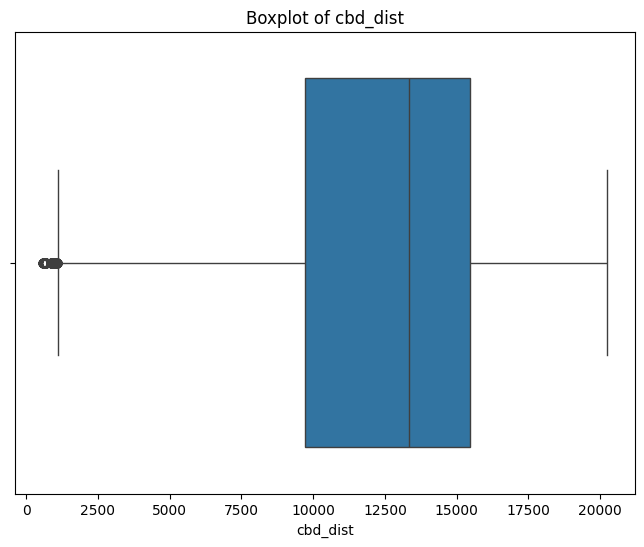

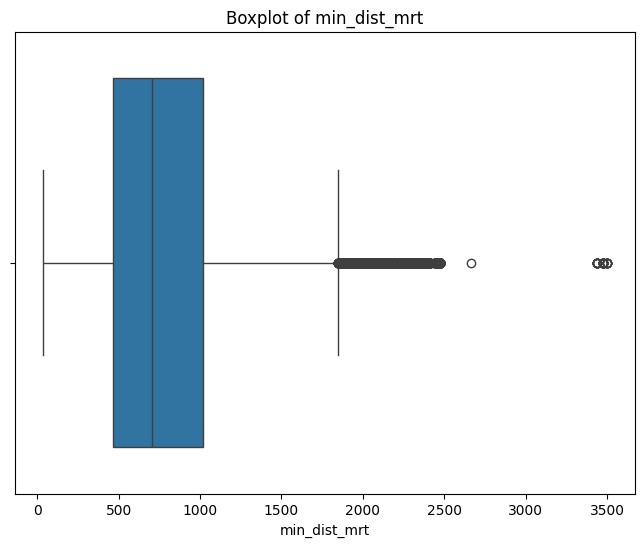

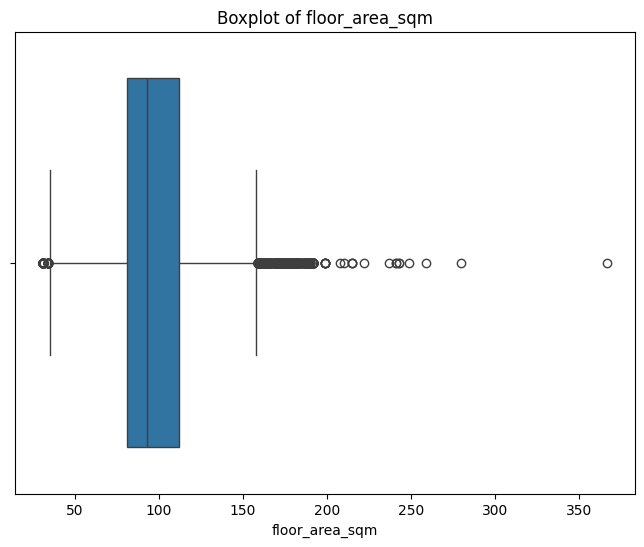

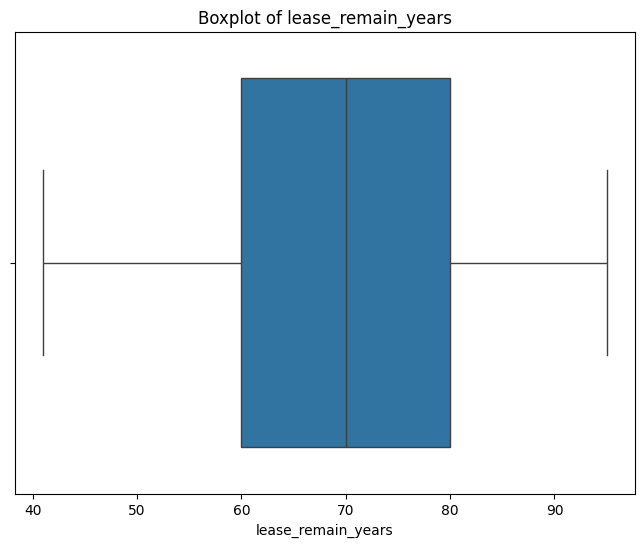

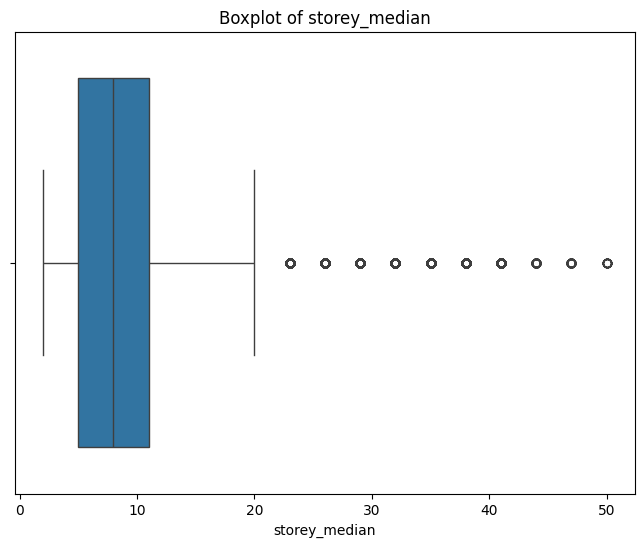

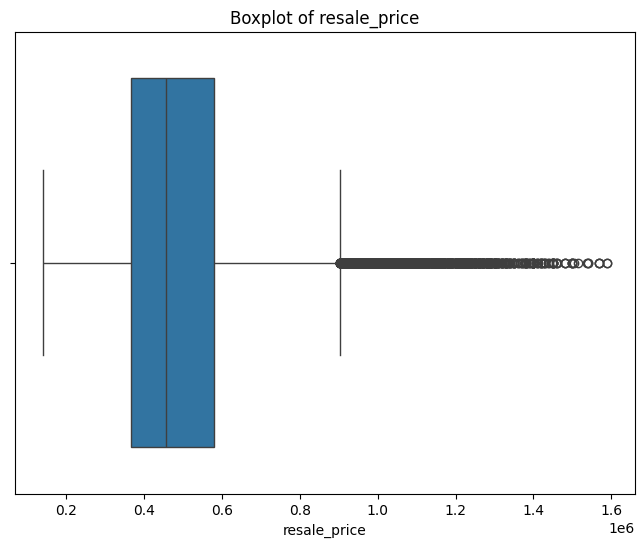

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns(continuous variables) for finding skewness
col = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [20]:
df1 = scope_df

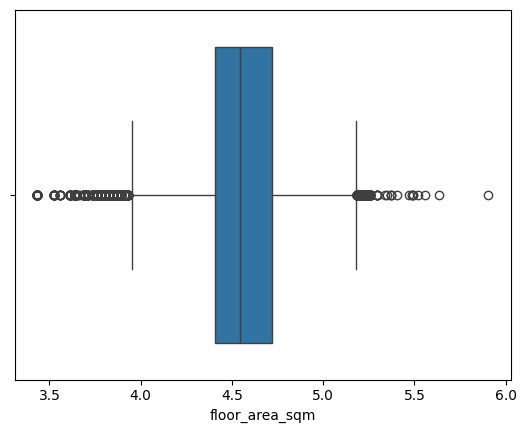

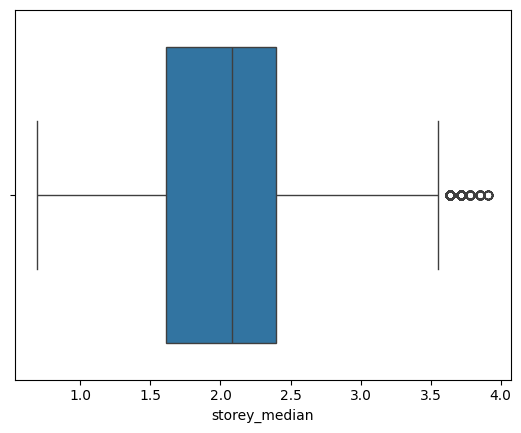

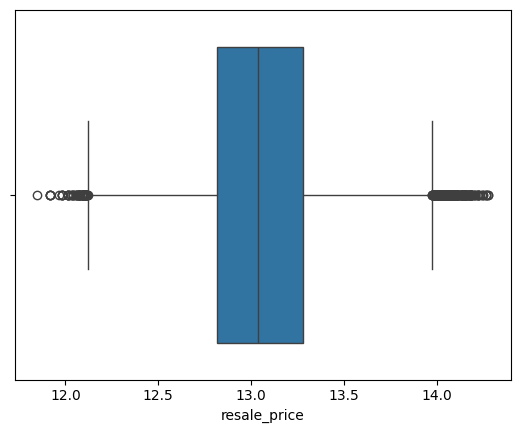

In [21]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great
                                                                # effect on the data, so no need to apply for that columns

df1['floor_area_sqm'] = np.log(df1['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm', data=df1)
plt.show()

df1['storey_median'] = np.log(df1['storey_median'])
sns.boxplot(x='storey_median', data=df1)
plt.show()

df1['resale_price'] = np.log(df1['resale_price'])
sns.boxplot(x='resale_price', data=df1)
plt.show()

In [22]:
df1.dtypes

cbd_dist              float64
min_dist_mrt          float64
floor_area_sqm        float64
lease_remain_years      int64
storey_median         float64
resale_price          float64
dtype: object

# Visualization among different columns using Correlation Matrix

<Axes: title={'center': 'Correlation Heatmap'}>

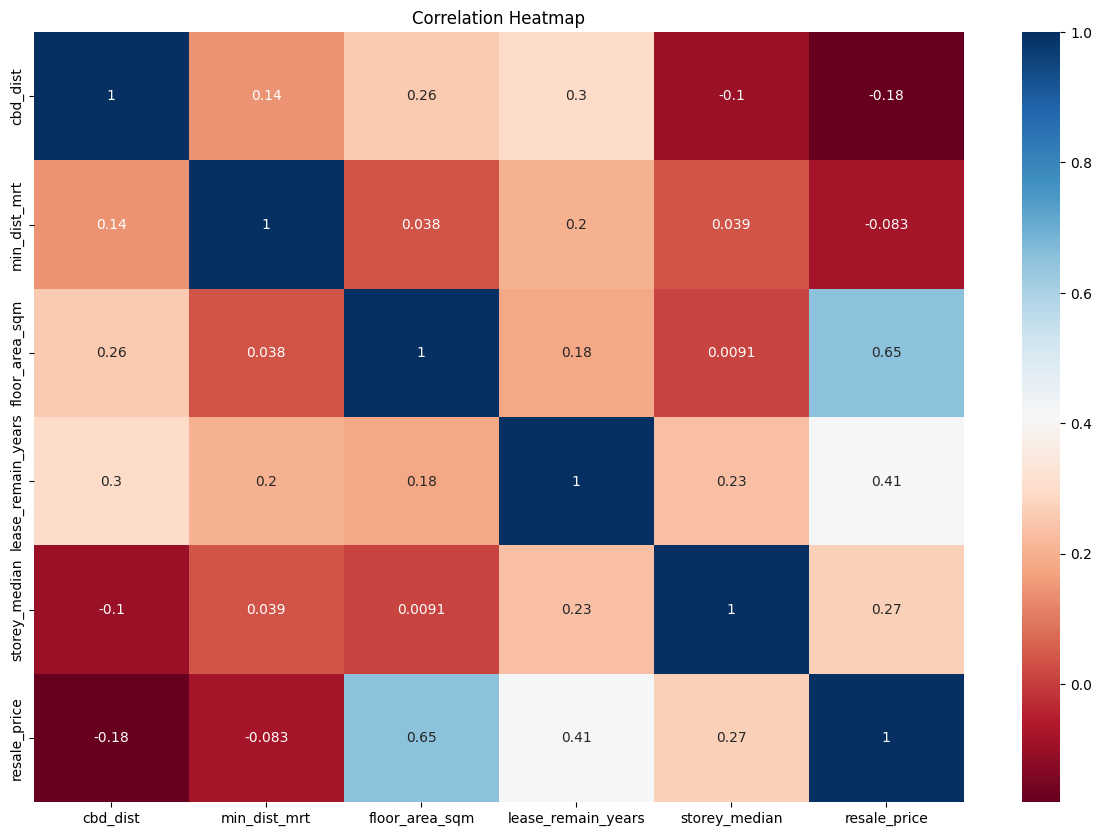

In [23]:
import seaborn as sns

corrMatrix = df1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix,
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu',
    annot=True
)

# Encoding Data

In [24]:
from sklearn.preprocessing import StandardScaler

X=df1[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']]
y=df1['resale_price']

# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
test_dataframe = pd.DataFrame(X)
test_dataframe

,0,1,2,3,4
0,-0.490492,0.708907,-1.762372,-0.677536,0.211783
1,-0.490492,0.708907,-1.762372,-0.677536,0.655024
2,-0.490492,0.708907,-1.218168,-0.677536,-0.442394
3,-0.490492,0.708907,-2.882546,-0.677536,0.211783
4,-0.490492,0.708907,-1.698010,-0.677536,-0.442394
...,...,...,...,...,...
215892,1.279066,-1.300697,0.026951,1.811649,0.211783
215893,-0.059312,4.274480,-2.631246,1.811649,-1.717739
215894,-1.580907,-1.191226,-1.332700,-1.702495,-1.717739
215895,1.268720,-1.402869,-2.713224,1.811649,0.655024


# Splitting the Data for Training and Testing Purposes

In [26]:
from sklearn.model_selection import train_test_split

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 3}
 
Mean squared error: 0.017862681592126887
Mean Absolute Error 0.10692308827867873
Root Mean squared error: 0.13365134339813756
 
R-squared: 0.838871957892303


# Testing Our Trained Model (Decision Tree Regressor)

In [28]:
new_sample = np.array([[8740, 999, np.log(44), 55, np.log(11)]])
new_sample = scaler.transform(new_sample[:, :5])
new_pred = best_model.predict(new_sample)[0]
np.exp(new_pred)

231876.91748727078

In [29]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)